# **Michael J. Fox Foundation Model for FOG Events**

Retrieving defog data from files

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive', force_remount=True)


path = "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/defog"
# In order for the following code above to work ^^^^^you must have the copy of the folder in your own Google Drive
# Change 'defog' if you would like to inspect a different folder (tdcsfog/defog/notype)

# connect file to google drive
os.listdir(path)

#all_dataframes = {}
big_df_list1 = []

#Combined all files into one dataframe
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        try:
            full_path = os.path.join(path, filename)
            df = pd.read_csv(full_path)
            big_df_list1.append(df)
           # all_dataframes[filename] = df
        except Exception as e:
            print(f"Error loading {filename}: {e}")


defog_dataframe = pd.concat(big_df_list1, ignore_index=True)
print(defog_dataframe.head())
print(defog_dataframe.shape)

Mounted at /content/drive
   Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  Valid  \
0     0 -0.949674  0.027301 -0.358175                0     0        0  False   
1     1 -0.949707  0.027119 -0.361305                0     0        0  False   
2     2 -0.951082  0.024896 -0.361723                0     0        0  False   
3     3 -0.950639  0.025920 -0.358969                0     0        0  False   
4     4 -0.952554  0.027264 -0.357626                0     0        0  False   

    Task  
0  False  
1  False  
2  False  
3  False  
4  False  
(13525702, 9)


Retrieve tdcsfog files



In [ ]:
path = "/content/drive/MyDrive/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog"
 # In order for the following code above to work ^^^^^you must have the copy of the folder in your own Google Drive
# Change 'defog' if you would like to inspect a different folder (tdcsfog/defog/notype)

# connect file to google drive
os.listdir(path)

#all_dataframes = {}
big_df_list2 = []

#Combined all files into one dataframe
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        try:
            full_path = os.path.join(path, filename)
            df = pd.read_csv(full_path)
            big_df_list2.append(df)
           # all_dataframes[filename] = df
        except Exception as e:
            print(f"Error loading {filename}: {e}")


tdcsfog_dataframes = pd.concat(big_df_list2, ignore_index=True)

# defog

Inspect Data


In [ ]:
defog_dataframe.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-0.949674,0.027301,-0.358175,0,0,0,False,False
1,1,-0.949707,0.027119,-0.361305,0,0,0,False,False
2,2,-0.951082,0.024896,-0.361723,0,0,0,False,False
3,3,-0.950639,0.025920,-0.358969,0,0,0,False,False
4,4,-0.952554,0.027264,-0.357626,0,0,0,False,False


In [ ]:
defog_dataframe.shape

(13525702, 9)

In [ ]:
defog_dataframe.columns

Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking',
       'Valid', 'Task'],
      dtype='object')

In [ ]:
defog_dataframe.describe()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
count,1.352570e+07,1.352570e+07,1.352570e+07,1.352570e+07,1.352570e+07,1.352570e+07,1.352570e+07
mean,8.661159e+04,-9.401729e-01,1.172785e-03,-1.306152e-01,3.696666e-05,4.343479e-02,7.283836e-03
std,6.479157e+04,8.606514e-02,1.200080e-01,2.823887e-01,6.079909e-03,2.038338e-01,8.503401e-02
min,0.000000e+00,-6.024701e+00,-4.059201e+00,-5.118650e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.725600e+04,-9.865706e-01,-6.250000e-02,-3.125000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.514900e+04,-9.531250e-01,2.384810e-03,-1.820305e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.211790e+05,-9.062500e-01,7.812500e-02,3.125000e-02,0.000000e+00,0.000000e+00,0.000000e+00
max,4.153870e+05,4.458365e+00,4.524038e+00,4.388132e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
defog_dataframe.dtypes

Time                 int64
AccV               float64
AccML              float64
AccAP              float64
StartHesitation      int64
Turn                 int64
Walking              int64
Valid                 bool
Task                  bool
dtype: object

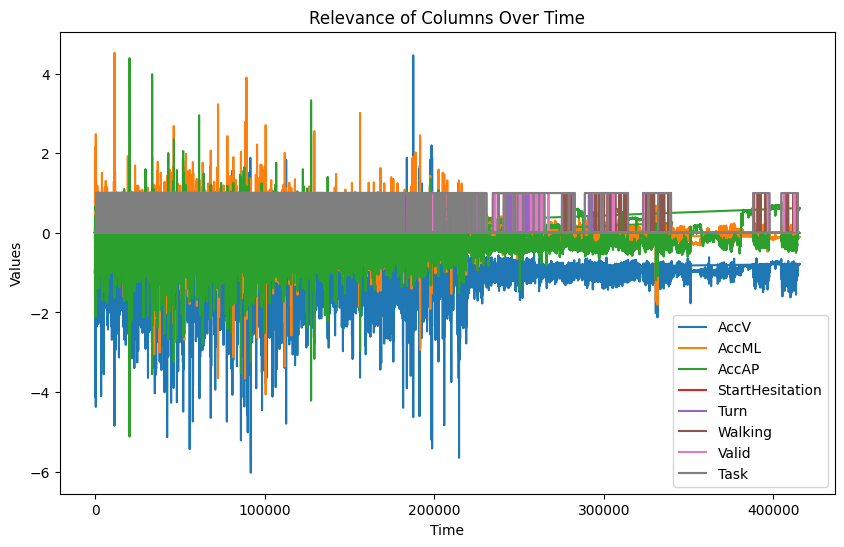

In [ ]:
# graph, takes very long to execute
fig, ax = plt.subplots(figsize=(10, 6))

for column in defog_dataframe.columns:
    if column != 'Time':
        ax.plot(defog_dataframe['Time'], defog_dataframe[column], label=column)

ax.set_title('Relevance of Columns Over Time')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.legend()
plt.show()

Filters for data cleaning


In [ ]:
# Filter the DataFrame to include only rows where both 'Valid' and 'Task' are True
# AND at least one of 'StartHesitation', 'Turn', or 'Walking' is True
filtered_defog_df = defog_dataframe[(defog_dataframe['Valid']) &
                                    (defog_dataframe['Task']) &
                                    ((defog_dataframe['StartHesitation']) |
                                     (defog_dataframe['Turn']) |
                                     (defog_dataframe['Walking']))]

# Get the count of rows in the filtered DataFrame
count_filtered_rows = filtered_defog_df.shape[0]

# Print the count
print(f"Number of rows meeting the criteria: {count_filtered_rows}")
print(filtered_defog_df.head())


Number of rows meeting the criteria: 685847
        Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking  \
38471  38471 -0.949638  0.281363 -0.531166                0     1        0   
38472  38472 -0.918431  0.281424 -0.480869                0     1        0   
38473  38473 -0.891975  0.237493 -0.487495                0     1        0   
38474  38474 -0.905892  0.172896 -0.545668                0     1        0   
38475  38475 -0.957020  0.105509 -0.579020                0     1        0   

       Valid  Task  
38471   True  True  
38472   True  True  
38473   True  True  
38474   True  True  
38475   True  True  


In [ ]:
print(filtered_defog_df.shape)


(685847, 9)


In [ ]:
filtered_defog_df.isna().sum()

Time               0
AccV               0
AccML              0
AccAP              0
StartHesitation    0
Turn               0
Walking            0
Valid              0
Task               0
dtype: int64

From this data,  we are using AccV, AccML, and AccAP to predict the start, stop, and occurence of events. We also need to determine the occurrences of 3 gait events: Start Hesitation, Turn, and Walking.

AccV, AccML, and AccAP Acceleration from a lower-back sensor on three axes: V - vertical, ML - mediolateral, AP - anteroposterior. Data is in units of m/s^2 for tdcsfog/ and g for defog/ and notype/.


## Predicting Start and Stop Time
Linear Regression Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
filtered_defog_df.columns

Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking',
       'Valid', 'Task'],
      dtype='object')

find start and stop times


training

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-21-3ec0bccc1049>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_defog_df['Cluster'] = kmeans.fit_predict(df_subset)


5040052     1
2879653     0
9767100     0
11025397    1
5768831     1
           ..
3449805     0
5451812     0
12634657    0
8413865     0
5503296     0
Name: Cluster, Length: 137170, dtype: int32
Accuracy score for max_depth=2: 0.9401837136400087
Accuracy score for max_depth=5: 0.9725450171320259
Accuracy score for max_depth=10: 0.9937012466282715
Accuracy score for max_depth=20: 0.997229714952249


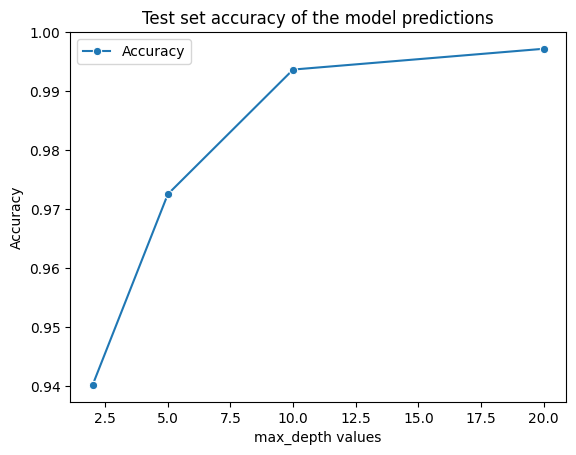

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Apply K-means Clustering
num_clusters = 2  # For start and stop
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Explicitly create a copy of the DataFrame
df_subset = filtered_defog_df[['AccV', 'AccML', 'AccAP']].copy()

# Fit and predict clusters
filtered_defog_df['Cluster'] = kmeans.fit_predict(df_subset)

# Step 2: Identify Start and Stop Times
# Group by cluster and find the average values for each cluster
cluster_centers = filtered_defog_df.groupby('Cluster')[['AccV', 'AccML', 'AccAP']].mean()

# Identify the start and stop clusters
start_cluster = cluster_centers['AccV'].idxmax()
stop_cluster = cluster_centers['AccV'].idxmin()

# Identify the start and stop times based on the identified clusters
start_times = filtered_defog_df[filtered_defog_df['Cluster'] == start_cluster]['Time']
stop_times = filtered_defog_df[filtered_defog_df['Cluster'] == stop_cluster]['Time']

# Step 3: Prepare Features and Labels
features = filtered_defog_df[['AccV', 'AccML', 'AccAP']]

# Assuming 'labels' are the clusters identified for each sample (0 for start, 1 for stop)
labels = filtered_defog_df['Cluster']

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

print(y_test)
def train_test_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=None):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score

max_depth_values = [2, 5, 10, 20]
accuracy_list = []

for max_depth in max_depth_values:
    accuracy = train_test_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=max_depth)
    accuracy_list.append(accuracy)
    print("Accuracy score for max_depth={}: {}".format(max_depth, accuracy))

# Visualize accuracy scores
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_values, y=accuracy_list, marker='o', label='Accuracy')
plt.title('Test set accuracy of the model predictions')
ax.set_xlabel('max_depth values')
ax.set_ylabel('Accuracy')
plt.show()



In [ ]:
print(y_test)


1189    0
543     0
1653    0
2802    0
934     0
       ..
216     0
1051    0
1117    0
3015    0
336     0
Name: Walking, Length: 1395, dtype: int64


## Predicting the 3 Gait Events
Classification Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Start Hesitation Predictions

Accuracy score for max_depth=2: 1.0
Accuracy score for max_depth=5: 1.0
Accuracy score for max_depth=10: 1.0
Accuracy score for max_depth=20: 1.0


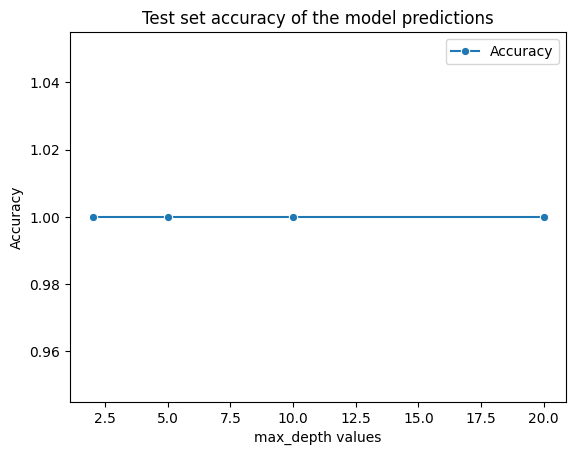

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
X = df[['AccV', 'AccML', 'AccAP']]  # Features
y = df['StartHesitation']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

def train_test_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=None):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score

max_depth_values = [2, 5, 10, 20]
accuracy_list = []

for max_depth in max_depth_values:
    accuracy = train_test_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=max_depth)
    accuracy_list.append(accuracy)
    print("Accuracy score for max_depth={}: {}".format(max_depth, accuracy))

# Visualize accuracy scores
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_values, y=accuracy_list, marker='o', label='Accuracy')
plt.title('Test set accuracy of the model predictions')
ax.set_xlabel('max_depth values')
ax.set_ylabel('Accuracy')
plt.show()


1189    0
543     0
1653    0
2802    0
934     0
       ..
216     0
1051    0
1117    0
3015    0
336     0
Name: Turn, Length: 1395, dtype: int64
Accuracy score for max_depth=2: 1.0
Accuracy score for max_depth=5: 1.0
Accuracy score for max_depth=10: 1.0
Accuracy score for max_depth=20: 1.0


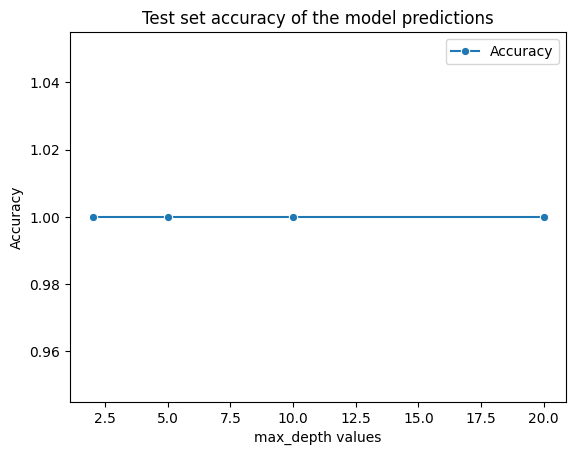

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
X = df[['AccV', 'AccML', 'AccAP']]  # Features
y = df['Turn']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
print(y_test)

def train_test_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=None):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score

max_depth_values = [2, 5, 10, 20]
accuracy_list = []

for max_depth in max_depth_values:
    accuracy = train_test_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=max_depth)
    accuracy_list.append(accuracy)
    print("Accuracy score for max_depth={}: {}".format(max_depth, accuracy))

# Visualize accuracy scores
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_values, y=accuracy_list, marker='o', label='Accuracy')
plt.title('Test set accuracy of the model predictions')
ax.set_xlabel('max_depth values')
ax.set_ylabel('Accuracy')
plt.show()


Accuracy score for max_depth=2: 1.0
Accuracy score for max_depth=5: 1.0
Accuracy score for max_depth=10: 1.0
Accuracy score for max_depth=20: 1.0


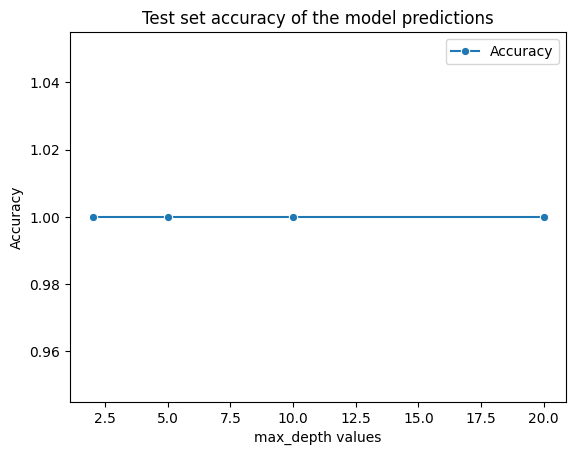

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
X = df[['AccV', 'AccML', 'AccAP']]  # Features
y = df['Walking']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

def train_test_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=None):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score

max_depth_values = [2, 5, 10, 20]
accuracy_list = []

for max_depth in max_depth_values:
    accuracy = train_test_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, max_depth=max_depth)
    accuracy_list.append(accuracy)
    print("Accuracy score for max_depth={}: {}".format(max_depth, accuracy))

# Visualize accuracy scores
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_values, y=accuracy_list, marker='o', label='Accuracy')
plt.title('Test set accuracy of the model predictions')
ax.set_xlabel('max_depth values')
ax.set_ylabel('Accuracy')
plt.show()
